In [2]:
#This code allows to work with Hessenberg functions, their corresponding isospectral matrix spaces.
#It also allows to compute Betti numbers of more general isospectral matrix manifolds by induction
#over face submanifolds usint Atiyah-Bredon-Franz-Puppe exact sequence.


#This technical function checks whether a given list is a list of values of some Hessenberg function.
#Input: list of Hessenberg function values h(1),...,h(n). 
#Output: True or False
def CheckIfHessenberg(h) :
    n=len(h) 
    if h[0]>n or h[0]<1 : 
        return False
    for i in range(1, n) :
        if h[i]<h[i-1] or h[i]<i or h[i]>n : return False
    return True

In [3]:
#This function generates the indefferent graph corresponding to a given Hessenberg function. 
#Input: list of Hessenberg function values h(1),...,h(n). 
#Output: pair (Graph, number of its edges)
def Gamma(h) :
    VertexSet = list(range(1, len(h)+1))
    EdgeSet = []
    for i in VertexSet :
        for j in range(i+1,h[i-1]+1) :
            EdgeSet.append([i,j])
    G=Graph([VertexSet, EdgeSet], format='vertices_and_edges')
    return G, len(EdgeSet)

In [4]:
#This function computes even degree Betti numbers of a regular semisimple Hessenberg variety with given h
#These are equal to Betti numbers of its twin, the manifold of isospectral staircase Hermitian matrices.
#Input: list of Hessenberg function values h(1),...,h(n). 
#Output: Hilbert series of even degree Betti numbers.

def HessenbergBetti(h) :
    Hilbert=0
    n=len(h)
    Sigma = SymmetricGroup(n)
    for g in Sigma :
        inversions = 0
        for i in range(1,n+1) :
            for j in range(i+1,h[i-1]+1) :
                if g(j)<g(i) :
                    inversions+=1
        Hilbert+=(t^inversions)
    return Hilbert

In [5]:
#Various data about Hessenberg matrix twins are accessed multiple times in the course of calculation.
#To save resources we store the data in a list called Zoo.
#The next function searches the entry of Zoo corresponding to the given graph.
#Input: graph
#Output: its index in the Zoo

def FindInZoo(G) :
    for i in range(0,len(Zoo)) :
        if G.is_isomorphic(Zoo[i][0]) : 
            return i
    return False

In [6]:
#For a given equiv.formal torus action T on manifold X we consider three polynomials.
#B(t) : Hilbert series (in sqrt(t)) of cohomology of X;
#A(t) : Hilbert series of relative cohomology of (Q,Q_-1), shifted in degree by dim T, where Q=X/T, and Q_-1 is the union of proper faces.
#Inter(t) : alternating sum of middle entries in ABFP sequence.
#####################################
#B(t) is computed via HessenbergBetti function.
#Inter(t) can be computed inductively from B(t) corresponding to proper faces. These are taken from Zoo. 
#This is done by the following function
#Input: graph (usually assumed indifferent), but we use the same function for Sun and Net, since all their proper induced subgraphs are indifferent
#Output: generating polynomial Inter(t)

def Intermediate(G) :
    M = Matroid(G)
    P = M.lattice_of_flats()
    n=len(G.vertices())
    ans=0
    
    for Pi in P :
        rk = M.rank(Pi)
        if rk<n-1:
            term = t^0
            MultPi=factorial(n)
            GPi=G.subgraph(edges=list(Pi))
            PartitionPi=GPi.connected_components()
            for S in PartitionPi :
                Component=GPi.subgraph(vertices = S)
                index=FindInZoo(Component)
                term=term*Zoo[index][4]
                MultPi=MultPi/factorial(len(S))
            ans +=MultPi*term*(t-1)^rk
    return ans

In [7]:
#The next function computes A(t) given B(t) and Inter(t) for data in Zoo using the formula
#B(t)-Inter(t)=A(t)*(t-1)^c, where c is the dim of effective torus action on matrix Hessenberg manifold. c equals length of Hess. fn. minus 1.
#Formula follows from exactness of ABFP sequence, using Euler characteristics.
#Input: index in Zoo
#Output: the function writes computed value of A(t) in Zoo. To check ourselves we make division of polynomials with reminder.
#The function outputs reminder, so it is easy to check the reminder is 0 for Hess.manifolds.

def ComputeRelHilbert (i) :
    entry = Zoo[i]
    n=len(entry[1])-1
    if n==0 :
        entry[4]=1
        return 0
    else :
        P=entry[3]-Intermediate(entry[0])
        divident = (t-1)^n
        ans, reminder = P.quo_rem(divident)
        entry[4]=ans
        return reminder

In [8]:
#This is technical function which displays the content of Zoo on the screen

def ShowZoo():
    i=1
    for animal in Zoo:
        print("Animal N", i)
        print("h=", animal[1])
        animal[0].show()
        print("d=", animal[2])
        print("Betti=",animal[3])
        print("ShiftedRelativeOrbit=",animal[4])
        i+=1

In [9]:
#This is the main program
#We introduce formal variable t to work with generating series
    
R.<t> = QQ[]

#The list of Hessenberg functions to be added to Zoo

ListOfHess=[
[1],
[2,2],
[2,3,3],[3,3,3],
[2,3,4,4],[3,3,4,4],[3,4,4,4],[4,4,4,4],
[2,3,4,5,5],[3,3,4,5,5],[2,4,4,5,5],[3,3,5,5,5],[3,4,4,5,5],[4,4,4,5,5],[3,4,5,5,5],[4,4,5,5,5],[4,5,5,5,5],[5,5,5,5,5]
]


In [10]:
#We initialize Zoo
#Each entry of Zoo has the form [indifferent graph, Hessenberg function, dimension of manifold, Betti numbers of Hess. manifold, A(t)]
#Last entry A(t) is a characteristic computed inductively. It will be added later.

Zoo = []
for h in ListOfHess :
    Zoo.append([Gamma(h)[0],h,Gamma(h)[1],HessenbergBetti(h),0])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Animal N 1
h= [1]


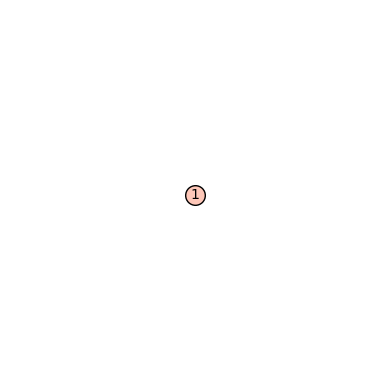

d= 0
Betti= 1
ShiftedRelativeOrbit= 1
Animal N 2
h= [2, 2]


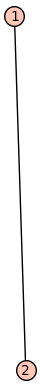

d= 1
Betti= t + 1
ShiftedRelativeOrbit= 1.0
Animal N 3
h= [2, 3, 3]


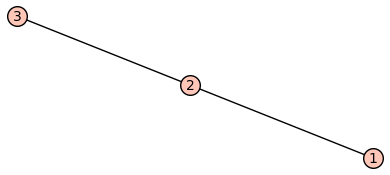

d= 2
Betti= t^2 + 4*t + 1
ShiftedRelativeOrbit= 1.0
Animal N 4
h= [3, 3, 3]


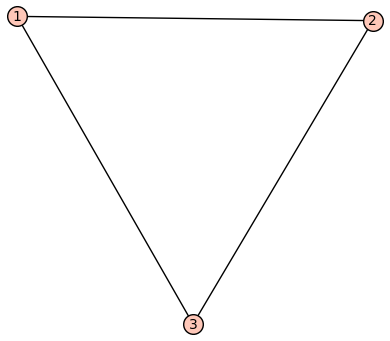

d= 3
Betti= t^3 + 2*t^2 + 2*t + 1
ShiftedRelativeOrbit= t + 4.0
Animal N 5
h= [2, 3, 4, 4]


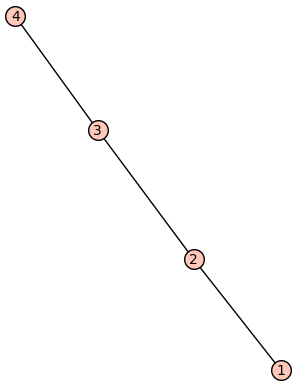

d= 3
Betti= t^3 + 11*t^2 + 11*t + 1
ShiftedRelativeOrbit= 1.0
Animal N 6
h= [3, 3, 4, 4]


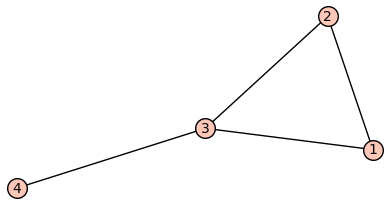

d= 4
Betti= t^4 + 6*t^3 + 10*t^2 + 6*t + 1
ShiftedRelativeOrbit= t + 5.0
Animal N 7
h= [3, 4, 4, 4]


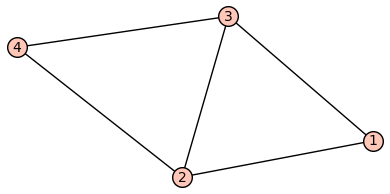

d= 5
Betti= t^5 + 3*t^4 + 8*t^3 + 8*t^2 + 3*t + 1
ShiftedRelativeOrbit= t^2 + 6.0*t + 15.0
Animal N 8
h= [4, 4, 4, 4]


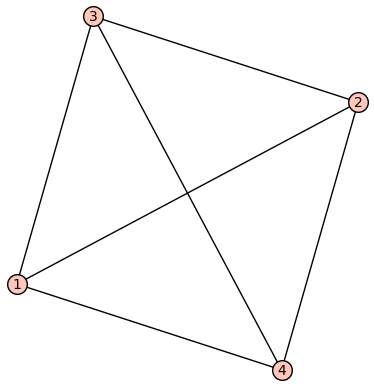

d= 6
Betti= t^6 + 3*t^5 + 5*t^4 + 6*t^3 + 5*t^2 + 3*t + 1
ShiftedRelativeOrbit= t^3 + 6.0*t^2 + 20.0*t + 33.0
Animal N 9
h= [2, 3, 4, 5, 5]


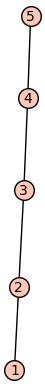

d= 4
Betti= t^4 + 26*t^3 + 66*t^2 + 26*t + 1
ShiftedRelativeOrbit= 1.0
Animal N 10
h= [3, 3, 4, 5, 5]


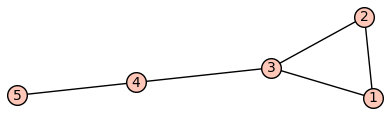

d= 5
Betti= t^5 + 17*t^4 + 42*t^3 + 42*t^2 + 17*t + 1
ShiftedRelativeOrbit= t + 6.0
Animal N 11
h= [2, 4, 4, 5, 5]


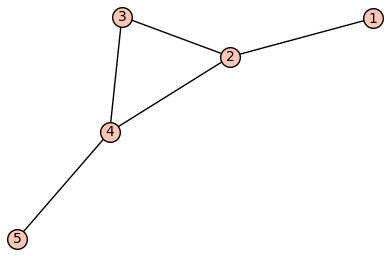

d= 5
Betti= t^5 + 12*t^4 + 47*t^3 + 47*t^2 + 12*t + 1
ShiftedRelativeOrbit= t + 6.0
Animal N 12
h= [3, 3, 5, 5, 5]


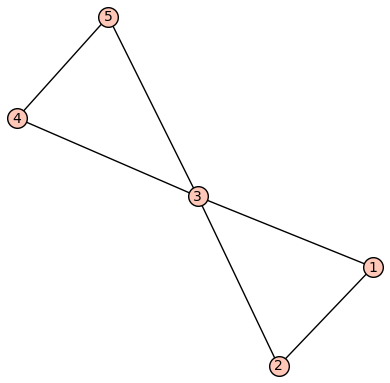

d= 6
Betti= t^6 + 8*t^5 + 29*t^4 + 44*t^3 + 29*t^2 + 8*t + 1
ShiftedRelativeOrbit= t^2 + 12.0*t + 31.0
Animal N 13
h= [3, 4, 4, 5, 5]


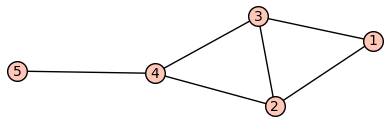

d= 6
Betti= t^6 + 8*t^5 + 29*t^4 + 44*t^3 + 29*t^2 + 8*t + 1
ShiftedRelativeOrbit= t^2 + 7.0*t + 21.0
Animal N 14
h= [4, 4, 4, 5, 5]


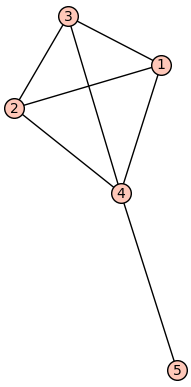

d= 7
Betti= t^7 + 8*t^6 + 20*t^5 + 31*t^4 + 31*t^3 + 20*t^2 + 8*t + 1
ShiftedRelativeOrbit= t^3 + 7.0*t^2 + 27.0*t + 51.0
Animal N 15
h= [3, 4, 5, 5, 5]


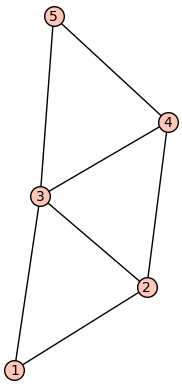

d= 7
Betti= t^7 + 4*t^6 + 17*t^5 + 38*t^4 + 38*t^3 + 17*t^2 + 4*t + 1
ShiftedRelativeOrbit= t^3 + 8.0*t^2 + 33.0*t + 66.0
Animal N 16
h= [4, 4, 5, 5, 5]


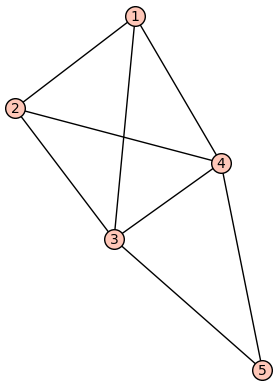

d= 8
Betti= t^8 + 4*t^7 + 13*t^6 + 26*t^5 + 32*t^4 + 26*t^3 + 13*t^2 + 4*t + 1
ShiftedRelativeOrbit= t^4 + 8.0*t^3 + 34.0*t^2 + 93.0*t + 136.0
Animal N 17
h= [4, 5, 5, 5, 5]


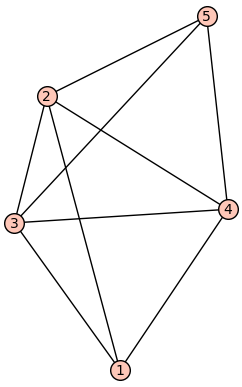

d= 9
Betti= t^9 + 4*t^8 + 9*t^7 + 19*t^6 + 27*t^5 + 27*t^4 + 19*t^3 + 9*t^2 + 4*t + 1
ShiftedRelativeOrbit= t^5 + 8.0*t^4 + 35.0*t^3 + 105.0*t^2 + 223.0*t + 266.0
Animal N 18
h= [5, 5, 5, 5, 5]


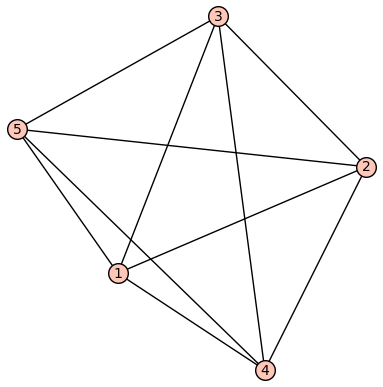

d= 10
Betti= t^10 + 4*t^9 + 9*t^8 + 15*t^7 + 20*t^6 + 22*t^5 + 20*t^4 + 15*t^3 + 9*t^2 + 4*t + 1
ShiftedRelativeOrbit= t^6 + 8.0*t^5 + 35.0*t^4 + 111.0*t^3 + 260.0*t^2 + 453.0*t + 456.0


In [11]:
#Here we compute A(t)

for i in range(0,len(Zoo)) :
    reminder = ComputeRelHilbert(i)
    # and output reminders to check ourselves
    print(reminder)

#This shows all information about indifferent graphs with up to 5 vertices.
ShowZoo()

In [12]:
#These are the graphs our primary interest. We don't have them in Zoo, since they are not indifferent    
MySet = [1,2,3,4,5,6]    
Net = Graph([MySet, [[1,2],[1,3],[2,3],[1,4],[2,5],[3,6]]], format='vertices_and_edges')
Sun = Graph([MySet, [[1,2],[1,3],[2,3],[1,4],[2,4],[2,5],[3,5],[1,6],[3,6]]], format='vertices_and_edges')

#Here we compute Inter(t) polynomials for Sun and Net

Inter=Intermediate(Net)
print("Net intermediate=",Inter)

Inter=Intermediate(Sun)
print("Sun intermediate=", Inter)

Net intermediate= 18.0*t^5 + 171.0*t^4 + 336.0*t^3 + 186.0*t^2 + 6.0*t + 3.0
Sun intermediate= 18.0*t^7 + 72.0*t^6 + 384.0*t^5 + 540.0*t^4 - 1560.0*t^3 + 2322.0*t^2 - 1362.0*t + 306.0
